In [9]:
from data_loading import *
from data_preprocessing import *
from CNN_model import *
import warnings
warnings.filterwarnings('ignore')

In [10]:
import time
import os

In [11]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
print(train_data.shape)

(962794, 10)


In [13]:
train_data[358461]

array([  1565,    569,  10558,    490,   2109,   4032, 281971,    446,
          709,      0], dtype=int32)

In [14]:
data_sequences.shape #before spliting to train and test set

(1375421, 10)

In [15]:
np.where(train_data == 281971)

(array([358461]), array([6]))

In [16]:
train_classes[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

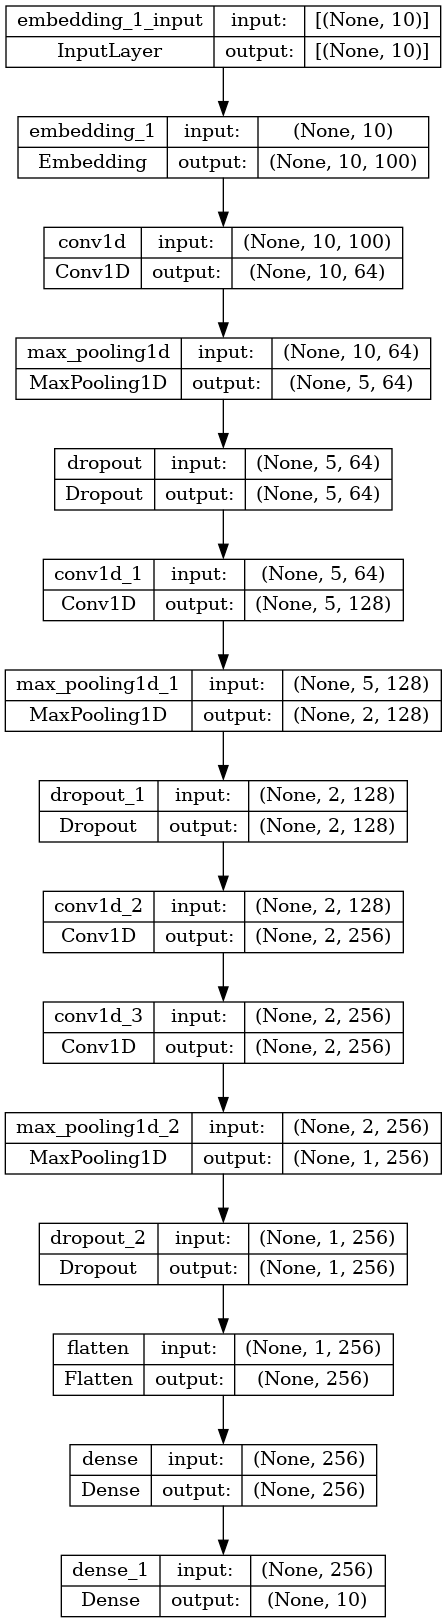

In [4]:
from keras.utils.vis_utils import plot_model
# plot the model diagram
plot_model(cnn_model, to_file='CNN_model_diagram.png', show_shapes=True, show_layer_names=True)

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           28197700  
                                                                 
 conv1d (Conv1D)             (None, 10, 64)            25664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 64)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            32896     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                    

In [6]:
%%time


# Initialize lists to store the loss values
train_loss = []
val_loss = []
train_acc = []
val_acc = []


early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=1, verbose=1, factor=0.1, min_delta=0.001, min_lr=0.00001)
    

    
# Train the model for 10 epochs

with tf.device('/GPU:0'):
    history_CNN = cnn_model.fit(x=train_data, y=train_classes, epochs=40,
                        batch_size=2048, shuffle=True,
                        validation_data=(val_data, val_classes),
                        callbacks=[reduce_lr, early_stopping],
                        )

# Save model
cnn_model.save(f'save/CNN_model_40.h5')
    
# Append the loss values to the lists
train_loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']
train_acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']

# Save loss to txt files
if not os.path.exists('Epoch_history'):
    os.makedirs('Epoch_history')
np.savetxt('Epoch_history/train_loss_cnn.txt', train_loss, delimiter=',')
np.savetxt('Epoch_history/val_loss_cnn.txt', val_loss, delimiter=',')
np.savetxt('Epoch_history/train_acc_cnn.txt', train_acc, delimiter=',')
np.savetxt('Epoch_history/val_acc_cnn.txt', val_acc, delimiter=',')

Epoch 1/40


2023-03-17 12:04:30.629501: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-03-17 12:04:31.946322: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-17 12:04:32.018089: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-17 12:04:32.018146: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-03-17 12:04:32.096276: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-17 12:04:32.096423: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-03-17 12:04:33.297792: I tensorflow/stream_executor/cuda/c

471/471 [==============================] - 14s 19ms/step - loss: 1.5821 - accuracy: 0.4685 - val_loss: 1.2857 - val_accuracy: 0.5814 - lr: 1.0000e-04
Epoch 2/40
471/471 [==============================] - 9s 19ms/step - loss: 1.2910 - accuracy: 0.5829 - val_loss: 1.2126 - val_accuracy: 0.6087 - lr: 1.0000e-04
Epoch 3/40
471/471 [==============================] - 9s 19ms/step - loss: 1.2251 - accuracy: 0.6072 - val_loss: 1.1727 - val_accuracy: 0.6231 - lr: 1.0000e-04
Epoch 4/40
471/471 [==============================] - 9s 19ms/step - loss: 1.1846 - accuracy: 0.6215 - val_loss: 1.1454 - val_accuracy: 0.6322 - lr: 1.0000e-04
Epoch 5/40
471/471 [==============================] - 9s 19ms/step - loss: 1.1551 - accuracy: 0.6315 - val_loss: 1.1253 - val_accuracy: 0.6390 - lr: 1.0000e-04
Epoch 6/40
471/471 [==============================] - 9s 19ms/step - loss: 1.1317 - accuracy: 0.6392 - val_loss: 1.1101 - val_accuracy: 0.6443 - lr: 1.0000e-04
Epoch 7/40
471/471 [==============================

In [8]:
import matplotlib.pyplot as plt

train_loss = np.loadtxt('Epoch_history/train_loss_cnn.txt', delimiter=',')
val_loss = np.loadtxt('Epoch_history/val_loss_cnn.txt', delimiter=',')


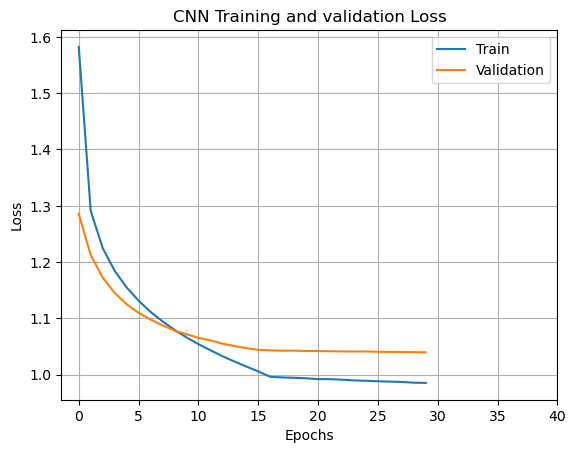

In [15]:
import matplotlib.pyplot as plt

#epochs = range(0,len(history_CNN.history['accuracy']),5)
epochs = range(0,41,5)

# plt.plot(history_CNN.history['accuracy'], label='Training accuracy')
# plt.plot(history_CNN.history['val_accuracy'], label='Validation accuracy')

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('CNN Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.xticks(epochs)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [9]:
train_acc = np.loadtxt('Epoch_history/train_acc_cnn.txt', delimiter=',')
val_acc = np.loadtxt('Epoch_history/val_acc_cnn.txt', delimiter=',')

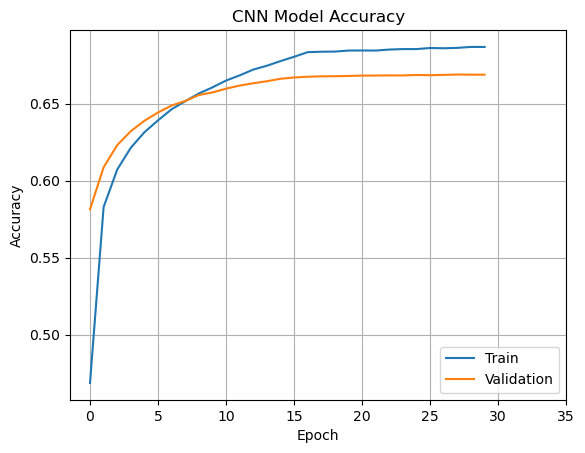

In [16]:
epochs = range(0,40,5)



# plt.plot(history_CNN.history['accuracy'])
# plt.plot(history_CNN.history['val_accuracy'])
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.xticks(epochs)

plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Test

In [17]:
from tensorflow.keras.models import load_model

# If previous model exists, load it
if os.path.exists('save/CNN_model_40.h5'):
    cnn_model= load_model('save/CNN_model_40.h5')

In [22]:
test_data = test_data
test_labels = test_classes

2023-03-19 03:34:30.148190: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-03-19 03:34:32.366481: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-19 03:34:32.515112: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-19 03:34:32.515169: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-03-19 03:34:32.624232: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-19 03:34:32.624624: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


  19/6448 [..............................] - ETA: 38s   

2023-03-19 03:34:39.496015: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6448/6448 [==============================] - 23s 2ms/step


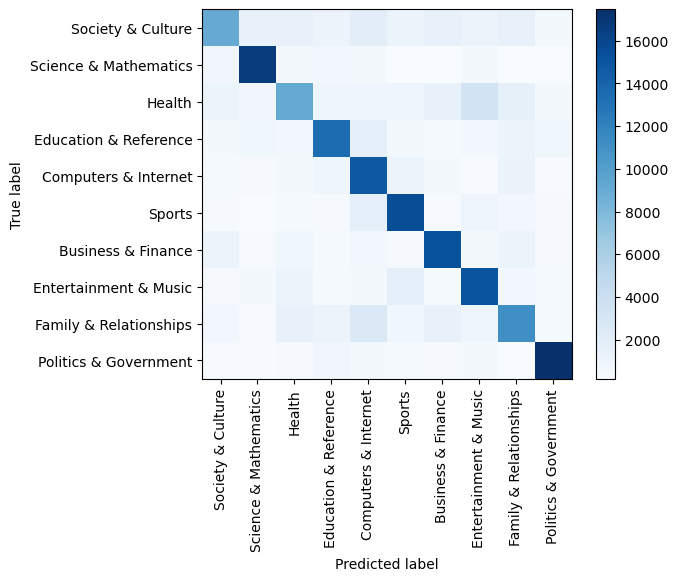

Accuracy: 0.6653870575290941


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet', 
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']

# Make predictions on the test set
predictions = cnn_model.predict(test_data)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))

# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10), class_names, rotation=90)
plt.yticks(range(10), class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate and print the accuracy
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) / len(np.argmax(test_labels, axis=1))
print('Accuracy:', accuracy)


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from prettytable import PrettyTable




class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet',
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']


# Predict the probabilities for each class
y_pred = predictions

# Calculate the ROC curves and AUC for each class
num_classes = test_labels.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a table of ROC curves for each class
table = PrettyTable()
table.field_names = ['Class', 'AUC', 'TPR at FPR = 0.01', 'TPR at FPR = 0.05', 'TPR at FPR = 0.1']
for i in range(num_classes):
    tpr_01 = np.interp(0.01, fpr[i], tpr[i])
    tpr_05 = np.interp(0.05, fpr[i], tpr[i])
    tpr_10 = np.interp(0.1, fpr[i], tpr[i])
    class_name = class_names[i]
    table.add_row([class_name, round( roc_auc[i],2), round(tpr_01,2), round(tpr_05,2), round(tpr_10,2)])
print(table)

+------------------------+------+-------------------+-------------------+------------------+
|         Class          | AUC  | TPR at FPR = 0.01 | TPR at FPR = 0.05 | TPR at FPR = 0.1 |
+------------------------+------+-------------------+-------------------+------------------+
|   Society & Culture    | 0.84 |        0.31       |        0.51       |       0.6        |
| Science & Mathematics  | 0.97 |        0.7        |        0.89       |       0.94       |
|         Health         | 0.87 |        0.28       |        0.5        |       0.63       |
| Education & Reference  | 0.93 |        0.51       |        0.7        |       0.79       |
|  Computers & Internet  | 0.94 |        0.41       |        0.72       |       0.84       |
|         Sports         | 0.96 |        0.53       |        0.8        |       0.87       |
|   Business & Finance   | 0.95 |        0.54       |        0.79       |       0.87       |
| Entertainment & Music  | 0.94 |        0.4        |        0.74     

In [19]:
from sklearn.metrics import classification_report
target_names = class_names
y_true = np.argmax(test_labels, axis=1) 
y_pred = np.argmax(y_pred, axis=1) 
print(classification_report(y_true=y_true,y_pred= y_pred, target_names=target_names))

                        precision    recall  f1-score   support

     Society & Culture       0.62      0.44      0.51     20687
 Science & Mathematics       0.78      0.83      0.80     20123
                Health       0.56      0.44      0.49     20645
 Education & Reference       0.67      0.65      0.66     20636
  Computers & Internet       0.58      0.73      0.65     20086
                Sports       0.68      0.75      0.72     20550
    Business & Finance       0.71      0.73      0.72     20800
 Entertainment & Music       0.63      0.72      0.67     20998
Family & Relationships       0.58      0.54      0.56     20805
 Politics & Government       0.82      0.83      0.83     20983

              accuracy                           0.67    206313
             macro avg       0.66      0.67      0.66    206313
          weighted avg       0.66      0.67      0.66    206313



In [34]:
res = classification_report(y_true=y_true,y_pred= y_pred, target_names=target_names)

In [35]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.6603720286516843

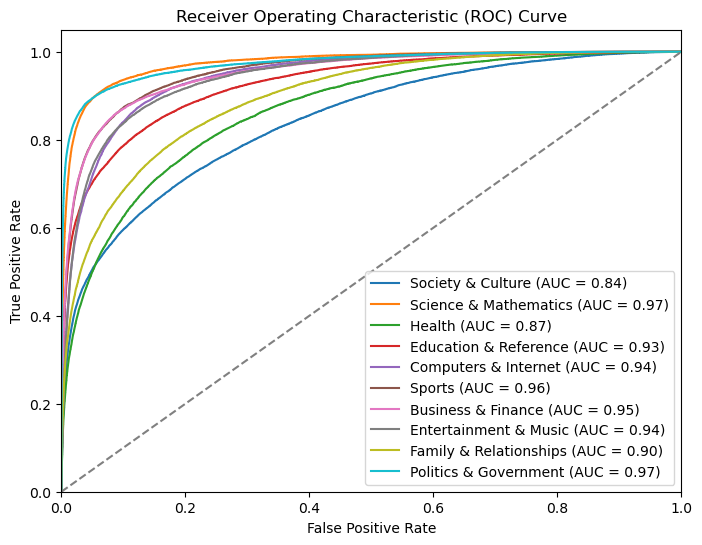

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl

mpl.rcParams['font.size'] = 10




# Make predictions on the test set
predictions =predictions

# Convert the labels to categorical format
test_labels_cat = test_labels

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [23]:
from sklearn.metrics import roc_auc_score
y_pred = predictions
score = roc_auc_score(test_labels, y_pred)
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.927463 

